# 2D Laplace Discrete Operators and their Solution

In [2]:
import numpy  as np
from src_dir import GMRES, matmul_a, resid, laplace_1d, mk_laplace_1d, mk_laplace_2d

%pylab inline

Populating the interactive namespace from numpy and matplotlib


The `mk_laplace_2d` function works pretty much the same way as `mk_laplace_1d` -- and we'll be using this API design going forward: The `mk_` functions generate the operators specific to the problem.

The nice thing about this approach is that -- as long as the `Nx`, and `Ny` dimensions of the input data (`b` and `x0`) match the `A_op` operator demensions (during creation), `GMRES` just "automagically" works :P

In [16]:
# use odd dimension because we want to put a point-source in the center.
# NOTE N[x,y] = 81 -- SLOW but pretty, N[x,y] = 41 -- Fast but less pretty
Nx = 41
Ny = 41
A_op = mk_laplace_2d(Nx, Ny)

In [21]:
b = np.zeros((Nx, Ny))
b[20, 20] = 1
x0 = np.zeros_like(b)

In [22]:
e = 0
nmax_iter = int(Nx/4)
restart   = 32
# Run GMRES
x_laplace = GMRES(A_op, b, x0, e, nmax_iter, restart=restart, debug=True)
r_laplace = resid(A_op, x_laplace, b)

Check the solution (left, pretty) and convergence rate (right)

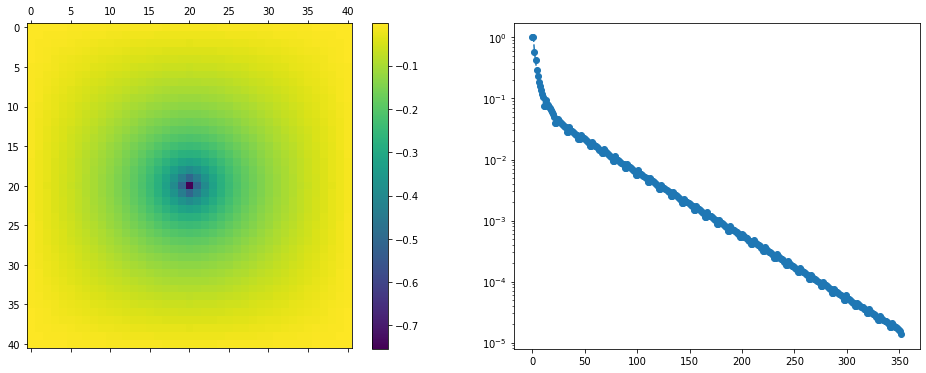

In [23]:
fig, ax = subplots(1, 2, figsize=(16,6))

mat = ax[0].matshow(x_laplace[-1])
fig.colorbar(mat, ax=ax[0])

ax[1].semilogy(r_laplace, '--o')

Check the operator residual (right, also pretty)

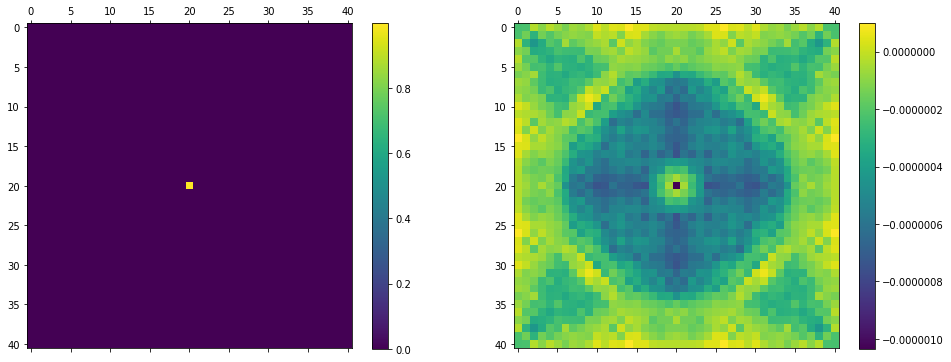

In [24]:
fig, ax = subplots(1, 2, figsize=(16,6))

mat_1 = ax[0].matshow(A_op(x_laplace[-1]))
fig.colorbar(mat_1, ax=ax[0])

mat_2 = ax[1].matshow(A_op(x_laplace[-1])-b)
fig.colorbar(mat_2, ax=ax[1])

## Prettyness of Errors!

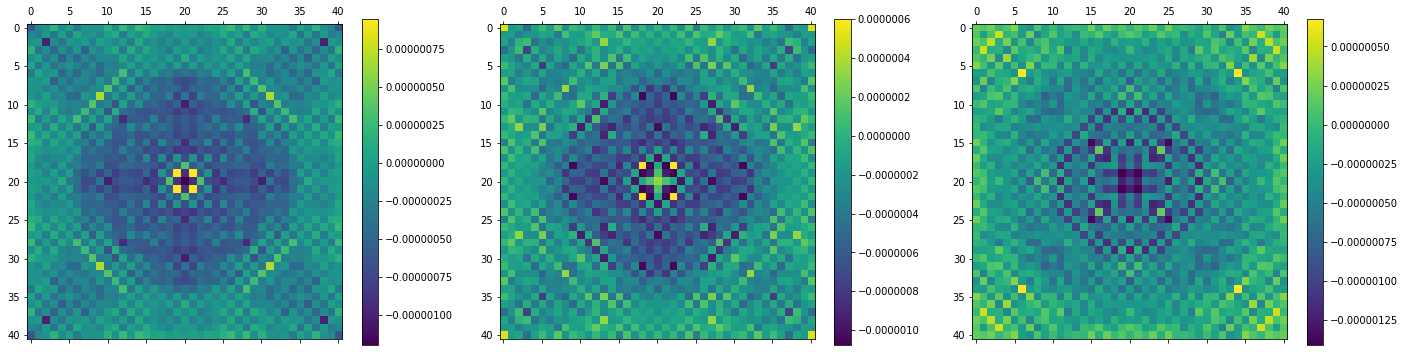

In [25]:
fig, ax = subplots(1, 3, figsize=(24,6))

mat_1 = ax[0].matshow(A_op(x_laplace[-2])-b)
fig.colorbar(mat_1, ax=ax[0])

mat_2 = ax[1].matshow(A_op(x_laplace[-4])-b)
fig.colorbar(mat_2, ax=ax[1])

mat_3 = ax[2].matshow(A_op(x_laplace[-8])-b)
fig.colorbar(mat_3, ax=ax[2])

In [26]:
e = 0
nmax_iter = int(Nx/8)
restart   = 64
# Run GMRES
x_laplace = GMRES(A_op, b, x0, e, nmax_iter, restart=restart, debug=True)
r_laplace = resid(A_op, x_laplace, b)

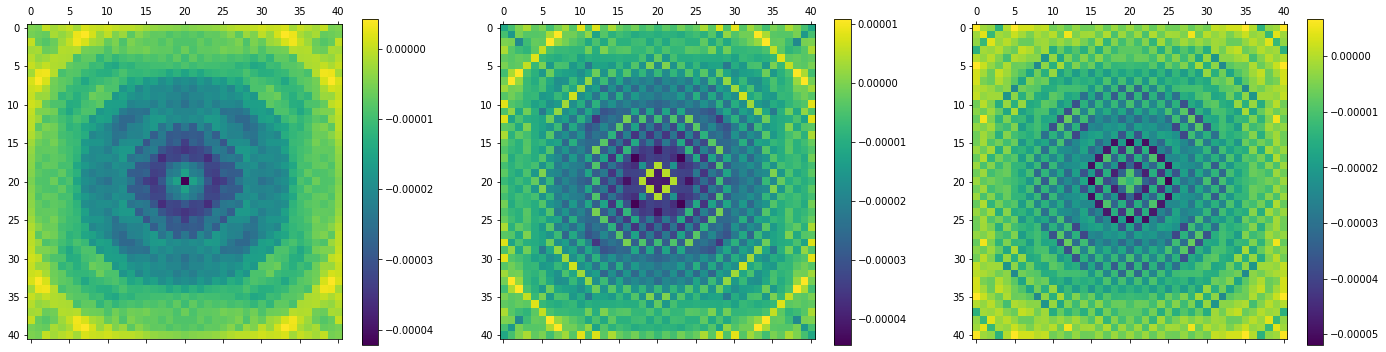

In [27]:
fig, ax = subplots(1, 3, figsize=(24,6))

mat_1 = ax[0].matshow(A_op(x_laplace[-1])-b)
fig.colorbar(mat_1, ax=ax[0])

mat_2 = ax[1].matshow(A_op(x_laplace[-2])-b)
fig.colorbar(mat_2, ax=ax[1])

mat_3 = ax[2].matshow(A_op(x_laplace[-4])-b)
fig.colorbar(mat_3, ax=ax[2])